# QRT ENS Data Challenge 2023 - Benchmark 

## Libraries

In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods. 

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated wwith a day and a country. 

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload. 

In [133]:
repository_path = r'C:\\Users\\hugot\\Documents\\Code\\EL_project'

In [134]:
x_test = pd.read_csv(os.path.join(repository_path, r'datasets\\X_test.csv'))
x_train = pd.read_csv(os.path.join(repository_path, r'datasets\\X_train.csv'))
y_train = pd.read_csv(os.path.join(repository_path, r'datasets\\y_train.csv'))

In [135]:
x_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [136]:
y_train.columns

Index(['ID', 'TARGET'], dtype='object')

# Data preprocessing

Encode `COUNTRY` column

In [137]:
x_train_encoded = pd.get_dummies(x_train, columns = ['COUNTRY'])
x_train_encoded.columns

Index(['ID', 'DAY_ID', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE',
       'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT',
       'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO',
       'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR',
       'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD',
       'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND',
       'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET', 'COUNTRY_DE',
       'COUNTRY_FR'],
      dtype='object')

Dealing with missing values : we'll replace them by the median

In [138]:
x_train_clean = x_train_encoded.fillna(x_train_encoded.median())


In [139]:
x_train_clean

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,1054,206,0.210099,-0.427458,-0.606523,0.606523,-0.306899,0.692860,0.306899,-0.692860,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,False,True
1,2049,501,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,False,True
2,1924,687,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,False,True
3,297,720,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,True,False
4,1101,818,0.143807,-0.617038,-0.924990,0.924990,-0.306899,0.990324,0.306899,-0.990324,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,...,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.876984,0.819520,1.320373,True,False
1490,1674,887,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,...,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.932633,-0.085690,0.356356,False,True
1491,748,1083,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,...,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,True,False
1492,1454,1133,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,...,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,False,True


In [140]:
y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


## Correlation between variables

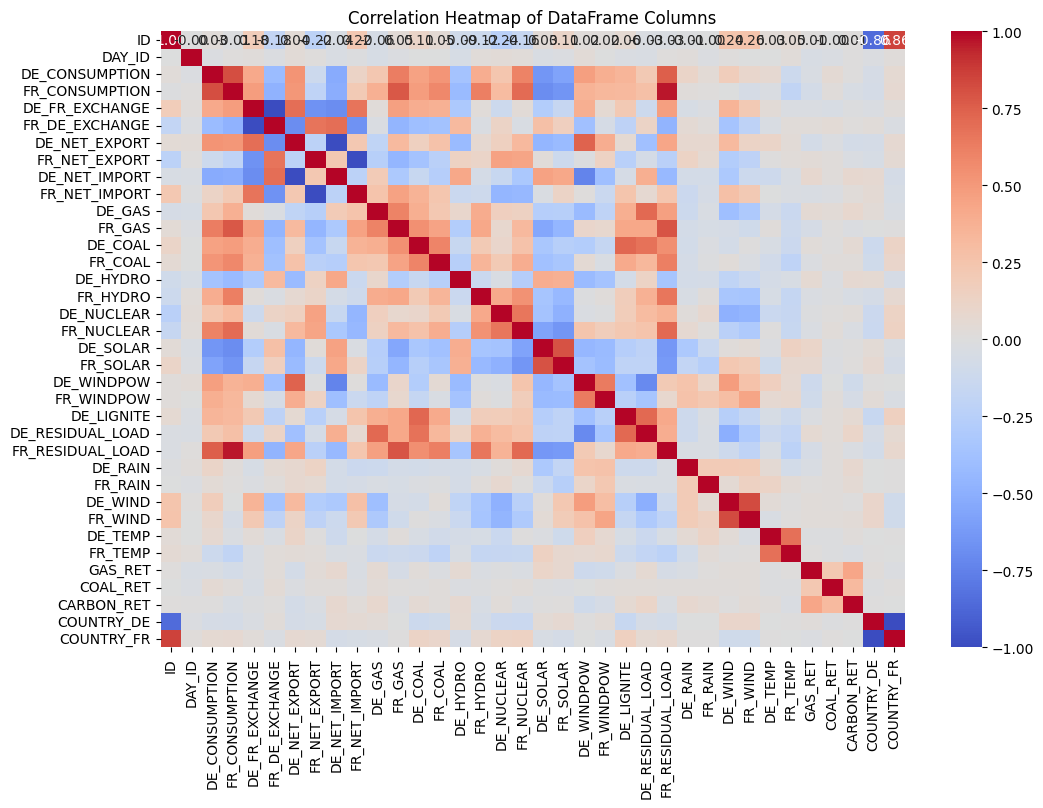

In [141]:
# Compute the correlation matrix
correlation_matrix = x_train_clean.astype('float64').corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

Let's find the features highly correlated :

In [142]:
threshold = 0.95

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print("High correlation between:", pair[0], "and", pair[1], ":", pair[2])

High correlation between: FR_CONSUMPTION and FR_RESIDUAL_LOAD : 0.9650862507900667
High correlation between: DE_FR_EXCHANGE and FR_DE_EXCHANGE : -1.0
High correlation between: DE_NET_EXPORT and DE_NET_IMPORT : -1.0
High correlation between: FR_NET_EXPORT and FR_NET_IMPORT : -1.0
High correlation between: COUNTRY_DE and COUNTRY_FR : -1.0


We can choose to delete these highly correlated variables. Let's define a function in this purpose.

In [143]:
def delete_high_correlation(x, threshold = 0.9):
    high_corr_pairs = []
    x_copy = x.copy()
    correlation_matrix = x_copy.astype('float64').corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

    for pair in high_corr_pairs:
        x_copy = x_copy.drop(pair[0], axis=1)
    return x_copy

In [144]:
x_train_clean = delete_high_correlation(x_train_clean, threshold = 1.1) #Setting a threshold of more than 1. will lead to no deletion

## Mutual information

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.



For finding mutual information all feature data must be treated as discrete and hence shall be in "numeric" format. Let's check it.

In [145]:
x_train_clean.dtypes

ID                    int64
DAY_ID                int64
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
COUNTRY_DE             bool
COUNTRY_FR          

Let's get rid of ID and date ID which don't add any information to the model

In [146]:
x_train_ids = x_train_clean['ID']# ID and Date ID -----> to be saved after the cleaning
x_train_clean_modified = x_train_clean.iloc[:, 2:] # Without ID and Date ID
x_train_clean_modified

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,0.210099,-0.427458,-0.606523,0.606523,-0.306899,0.692860,0.306899,-0.692860,0.441238,-0.213766,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,False,True
1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,False,True
2,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,False,True
3,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,True,False
4,0.143807,-0.617038,-0.924990,0.924990,-0.306899,0.990324,0.306899,-0.990324,0.238693,-0.240862,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,...,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.876984,0.819520,1.320373,True,False
1490,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,...,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.932633,-0.085690,0.356356,False,True
1491,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,...,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,True,False
1492,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,-0.003973,0.869742,...,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,False,True


In [147]:
y_train_modified = y_train.iloc[:,1:] #Without ID
y_train_modified

,TARGET
0,0.028313
1,-0.112516
2,-0.180840
3,-0.260356
4,-0.071733
...,...
1489,-0.172597
1490,-0.063546
1491,0.151797
1492,-0.640917


In [148]:
discrete_features = []
for feature in x_train_clean_modified.dtypes:
    if feature == 'bool':
        discrete_features.append(True)
    else:
        discrete_features.append(False)
discrete_features

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True]

In [149]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x_train_clean_modified, y_train_modified, discrete_features)
mi_scores[::]  # show a few features with their MI scores

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DE_RESIDUAL_LOAD    0.061239
DE_WINDPOW          0.057191
FR_NET_IMPORT       0.048782
FR_NET_EXPORT       0.047165
DE_WIND             0.044968
DE_LIGNITE          0.043599
DE_RAIN             0.036945
DE_NET_IMPORT       0.036088
DE_GAS              0.034585
DE_NET_EXPORT       0.034011
FR_CONSUMPTION      0.029383
DE_TEMP             0.028520
COUNTRY_FR          0.026644
COUNTRY_DE          0.026644
FR_WIND             0.025527
FR_WINDPOW          0.020429
FR_SOLAR            0.019287
GAS_RET             0.018788
DE_NUCLEAR          0.018694
FR_COAL             0.017226
DE_CONSUMPTION      0.016776
FR_NUCLEAR          0.015552
CARBON_RET          0.013792
DE_COAL             0.010615
FR_GAS              0.004839
FR_HYDRO            0.004632
DE_HYDRO            0.004456
FR_RAIN             0.004107
DE_SOLAR            0.003024
FR_RESIDUAL_LOAD    0.000000
FR_DE_EXCHANGE      0.000000
FR_TEMP             0.000000
COAL_RET            0.000000
DE_FR_EXCHANGE      0.000000
Name: MI Score

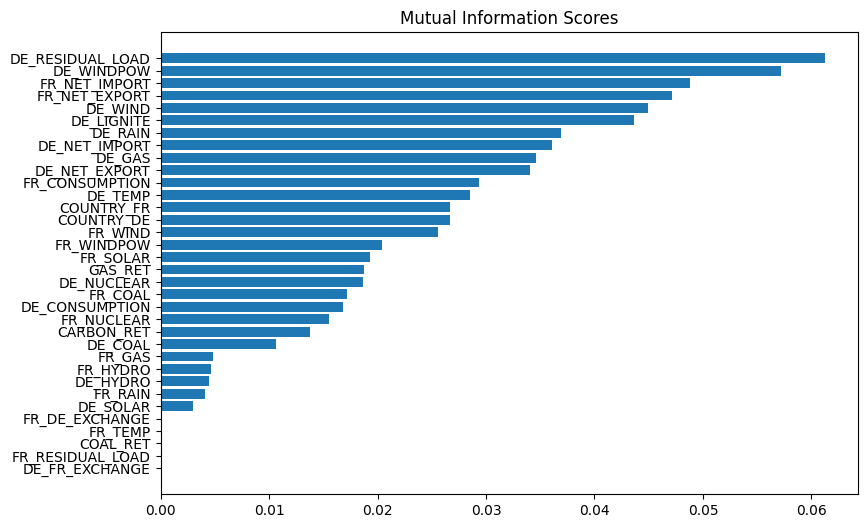

In [150]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(9, 6))
plot_mi_scores(mi_scores)

# Feature Engineering

- Energy Production Efficiency: DE_WIND / DE_CONSUMPTION or FR_SOLAR / FR_CONSUMPTION to capture how much of the consumption is covered by renewable sources.

- Weather Impact on Energy: FR_RAIN * FR_HYDRO to see if rain has a direct impact on hydroelectric power production.

- Net Exchange Ratios: Compute the net exchange ratios between countries to understand the dependency or contribution of cross-border exchanges to the total energy consumption or production, e.g., (DE_FR_EXCHANGE - FR_DE_EXCHANGE) / (DE_CONSUMPTION + FR_CONSUMPTION).

- Cross-Feature Interactions: (FR_WIND + FR_SOLAR) / FR_CONSUMPTION to capture the proportion of renewable energy in total consumption.

- Temperature Effect on Consumption: Since temperature can influence energy demand (e.g., heating in winter, cooling in summer), consider creating features like FR_TEMP * FR_CONSUMPTION and DE_TEMP * DE_CONSUMPTION to model this relationship.

- Renewable vs. Non-renewable Ratios: Calculate the ratio of renewable to non-renewable energy production for each country, e.g., (FR_WINDPOW + FR_SOLAR) / (FR_COAL + FR_GAS).

- Carbon Intensity: Create a feature representing the carbon intensity of electricity generation, e.g., (COAL_RET + GAS_RET) / (DE_CONSUMPTION + FR_CONSUMPTION), assuming coal and gas have higher carbon emissions compared to renewables.

In [151]:
def feature_engineering(df):
  df['energy_wind'] = df['DE_WIND']/df['DE_CONSUMPTION']
  df['energy_solar'] = df['FR_SOLAR']/df['FR_CONSUMPTION']
  df['weather_impact'] = df['FR_RAIN']*df['FR_HYDRO']
  df['net_energy_ratio'] = df['FR_DE_EXCHANGE'] - df['DE_FR_EXCHANGE'] / (df['DE_CONSUMPTION']+df['FR_CONSUMPTION'])
  df['cross_feature'] = (df['FR_WIND']+df['FR_SOLAR'])/df['FR_CONSUMPTION']
  df['FR_temp_impact'] = df['FR_TEMP']+df['FR_CONSUMPTION']
  df['DE_temp_impact'] = df['DE_TEMP']+df['DE_CONSUMPTION']
  df['REN_NON'] = (df['FR_WINDPOW'] + df['FR_SOLAR']) / (df['FR_COAL'] + df['FR_GAS'])
  df['carbon_intensity'] = (df['COAL_RET'] + df['GAS_RET']) / (df['DE_CONSUMPTION'] + df['FR_CONSUMPTION'])
  return df

In [152]:
X = feature_engineering(x_train_clean_modified)

In [153]:
X.columns

Index(['DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
       'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
       'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
       'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW',
       'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD',
       'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP',
       'GAS_RET', 'COAL_RET', 'CARBON_RET', 'COUNTRY_DE', 'COUNTRY_FR',
       'energy_wind', 'energy_solar', 'weather_impact', 'net_energy_ratio',
       'cross_feature', 'FR_temp_impact', 'DE_temp_impact', 'REN_NON',
       'carbon_intensity'],
      dtype='object')

In [154]:
X.head()

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,COUNTRY_FR,energy_wind,energy_solar,weather_impact,net_energy_ratio,cross_feature,FR_temp_impact,DE_temp_impact,REN_NON,carbon_intensity
0,0.210099,-0.427458,-0.606523,0.606523,-0.306899,0.692860,0.306899,-0.692860,0.441238,-0.213766,...,True,-3.764056,-2.921715,-0.115632,-2.183893,-2.259287,-0.490862,-0.858971,13.056610,-2.132838
1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,...,True,-67.963185,-3.226242,0.621845,0.000556,-4.051804,0.827788,0.415020,-9.337436,0.596555
2,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,...,True,0.309049,-0.187520,-0.244135,-1.324031,0.058913,2.093502,2.079919,-0.176691,0.379201
3,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,...,False,0.507879,-0.662913,-0.670238,0.381427,-0.384711,-1.266712,-0.632386,-1.572342,-0.335867
4,0.143807,-0.617038,-0.924990,0.924990,-0.306899,0.990324,0.306899,-0.990324,0.238693,-0.240862,...,True,-7.566776,-1.172680,0.337934,-1.029640,0.466701,0.112457,0.758146,-0.308411,-3.743874


Now we have a good preprocessed dataset ! Let's save it for future predictions...

In [155]:
#add ID :
X_ids = pd.concat([x_train_ids, X], axis=1)
X_ids.to_csv(os.path.join(repository_path, 'datasets\\X_train_preprocessed.csv'), index=False)


#### Improving baseline benchamrking with new features

In [156]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

In [157]:
lr = LinearRegression()
X.columns

Index(['DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
       'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
       'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
       'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW',
       'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD',
       'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP',
       'GAS_RET', 'COAL_RET', 'CARBON_RET', 'COUNTRY_DE', 'COUNTRY_FR',
       'energy_wind', 'energy_solar', 'weather_impact', 'net_energy_ratio',
       'cross_feature', 'FR_temp_impact', 'DE_temp_impact', 'REN_NON',
       'carbon_intensity'],
      dtype='object')

In [158]:
lr.fit(X, y_train_modified)

output_train = lr.predict(X)

def metric_train(output):

    return  spearmanr(output, y_train_modified).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output_train) ))


Spearman correlation for the train set: 28.6%


From above we can observe that we increased the spearman correlation score from 27.9% previously to 28.6% by adding new features

In [159]:
# Copy ID column for submission
Y_test_submission = x_test[['ID']].copy()

# Fill missing values with median and encode categorical variables
x_test_encoded = pd.get_dummies(x_test, columns = ['COUNTRY'])
x_test_clean = x_test_encoded.fillna(x_test_encoded.median())

#Drop high correlation columns
x_test_clean_1 = delete_high_correlation(x_test_clean, threshold = 1.1) #Setting a threshold of more than 1. will lead to no deletion

# Apply custom feature engineering (implementation not shown)
x_test_clean_2 = feature_engineering(x_test_clean_1)

# Drop unnecessary columns from the modified DataFrame
x_test_clean_3 = x_test_clean_2.drop(columns=['DAY_ID', 'ID'], axis=1)

#Set the x_test preprocessed
x_test_preprocessed = x_test_clean_3


In [160]:
x_test_preprocessed

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,COUNTRY_FR,energy_wind,energy_solar,weather_impact,net_energy_ratio,cross_feature,FR_temp_impact,DE_temp_impact,REN_NON,carbon_intensity
0,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,-0.519419,1.524963,0.423845,...,True,-2.889138,0.637011,0.067573,-4.105066,2.658743,0.258638,1.220574,-1.223265,-5.771091
1,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,-0.555367,1.064102,1.807256,...,True,-0.945976,1.326151,-0.032483,-0.981506,-0.238977,0.042915,0.186592,0.331744,0.634557
2,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,-0.666901,0.128004,-0.043300,...,True,0.472704,-0.016320,-0.005318,-1.956201,-0.685841,0.842034,1.660678,-1.492865,-1.194134
3,0.172555,-0.723427,-0.044539,0.044539,-0.235460,-0.205276,0.235460,0.205276,1.046069,-0.174150,...,True,-4.584737,-1.407848,-0.001526,-0.036313,-0.171636,-0.265970,0.411707,-0.040353,-2.751619
4,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,0.240856,1.376753,1.413967,...,True,-0.784432,-1.280357,-0.109170,-1.068058,-4.127049,0.732793,1.126271,-0.641495,-1.991969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0.267684,-0.901332,0.749769,-0.749769,1.198565,-1.614458,-1.198565,1.614458,-0.601501,0.012450,...,False,8.488081,-1.848283,0.414361,0.433489,-3.676577,-1.365015,-0.570950,-2.576787,0.554231
650,1.389207,1.466549,0.661778,-0.661778,0.610986,-1.934012,-0.610986,1.934012,0.993839,1.962333,...,False,0.928944,-0.541651,-0.104433,-0.893513,0.957859,0.294240,1.060109,0.528053,-0.765949
651,1.377650,1.781671,0.557006,-0.557006,-0.326698,-1.462676,0.326698,1.462676,3.215415,2.157089,...,True,-0.905285,-0.472876,-0.635453,-0.733312,-0.846855,0.520894,0.570014,-0.410028,0.342713
652,1.232202,1.971074,0.537247,-0.537247,-1.109420,-1.464287,1.109420,1.464287,2.534455,2.202872,...,False,0.158564,0.233972,-0.646803,-0.704966,0.181496,1.485913,2.585109,-0.035771,0.263192


Let's also save this x_test_preprocessed for future predictions

In [161]:
#get the id:
X_test_ids = pd.concat([Y_test_submission, x_test_preprocessed], axis = 1)

X_test_ids.to_csv(os.path.join(repository_path, 'datasets\\X_test_preprocessed.csv'), index=False)

Let's predict with baseline model with the preprocessed dataset

In [162]:
Y_test_submission['TARGET'] = lr.predict(x_test_preprocessed)

In [163]:
Y_test_submission.to_csv(os.path.join(repository_path, 'results\\benchmark_baseline_improved.csv'), index=False)
